In [26]:
from itertools import permutations
import matplotlib.pyplot as plt
from typing import List
import random
from util import plotear_ruta, generar_ciudades_con_distancias

In [27]:
class TSP:

    def __init__(self, ciudades, distancias):
        self.ciudades = ciudades
        self.distancias = distancias

    def encontrar_la_ruta_mas_corta(self):

        mejor_ruta = None
        distancia_minima = float('inf')
        ciudades = list(self.ciudades.keys())

        for permutacion in permutations(ciudades[1:]):
            ruta = [ciudades[0]] + list(permutacion)
            distancia_total = 0

            for i in range(len(ruta)-1):
                distancia_total += self.distancias[(ruta[i], ruta[i+1])]

            distancia_total += self.distancias[(ruta[-1], ruta[0])]

            if distancia_total < distancia_minima:
                distancia_minima = distancia_total
                mejor_ruta = ruta
        
        print(f'Distancia mínima encontrada: {distancia_minima:.2f}')
        return mejor_ruta
    
    def encontrar_vecino_cercano(self):

        ciudades_restantes = set(self.ciudades.keys())
        ciudad_actual = random.choice(list(ciudades_restantes))
        ruta = [ciudad_actual]
        ciudades_restantes.remove(ciudad_actual)

        while ciudades_restantes:

            ciudad_mas_cercana = min(ciudades_restantes, key=lambda ciudad: self.distancias[(ciudad_actual, ciudad)])
            ruta.append(ciudad_mas_cercana)
            ciudades_restantes.remove(ciudad_mas_cercana)
            ciudad_actual = ciudad_mas_cercana
        
        print('Ruta buscando vecinos cercanos.')
        return ruta


    def plotear_resultado(self, ruta: List[str], mostrar_anotaciones: bool = True):
        plotear_ruta(self.ciudades, ruta, mostrar_anotaciones)
    
    

In [28]:
def study_case_1(n_cities):
    
    ciudades, distancias = generar_ciudades_con_distancias(n_cities)
    tsp = TSP(ciudades, distancias)
    ruta = ciudades.keys()
    ruta1 = tsp.encontrar_la_ruta_mas_corta()
    tsp.plotear_resultado(ruta1)

    ruta2 = tsp.encontrar_vecino_cercano()
    tsp.plotear_resultado(ruta2)


In [29]:
def study_case_2():
    n_cities = 50
    ciudades, distancias = generar_ciudades_con_distancias(n_cities)
    tsp = TSP(ciudades, distancias)
    ruta = ciudades.keys()
    #ruta = tsp.encontrar_la_ruta_mas_corta()
    ruta = tsp.encontrar_vecino_cercano()
    tsp.plotear_resultado(ruta)

In [30]:
#if __name__ == "__main__":
    # Solve the TSP problem
    #study_case_2()

Distancia mínima encontrada: 582.85


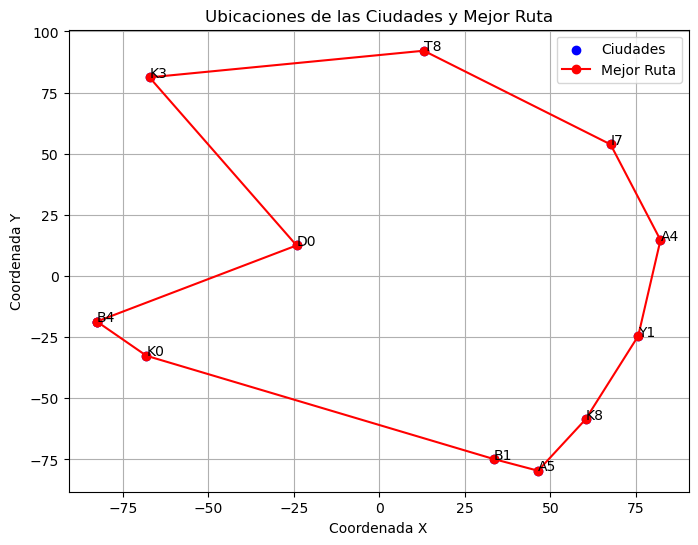

Ruta buscando vecinos cercanos.


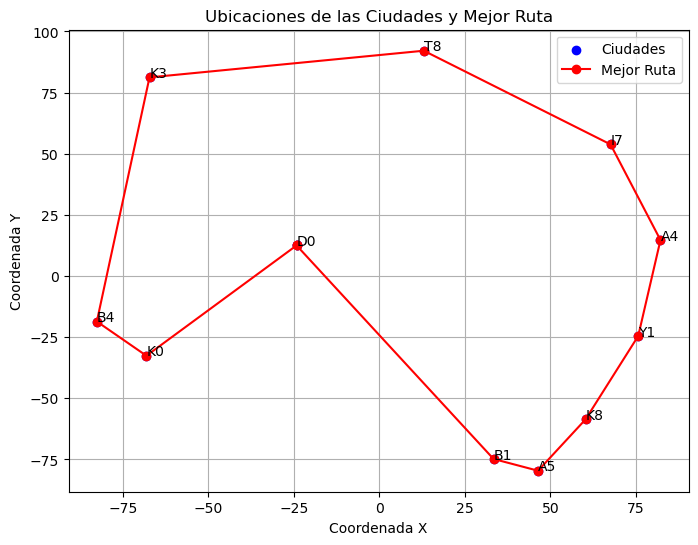

In [38]:
if __name__ == "__main__":
    # Solve the TSP problem
    num_c = int(input('Numero de ciudades:'))
    study_case_1(num_c)

Ruta buscando vecinos cercanos.


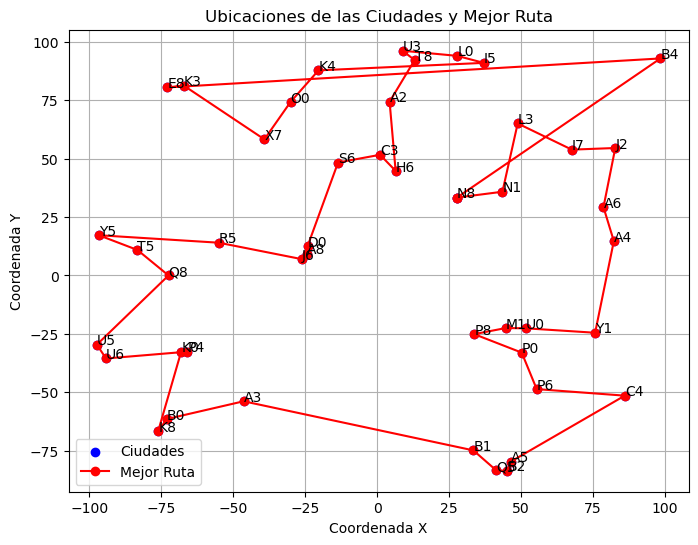

In [39]:
if __name__ == "__main__":
    #Solve the TSP problem
    study_case_2()